# Python avancé
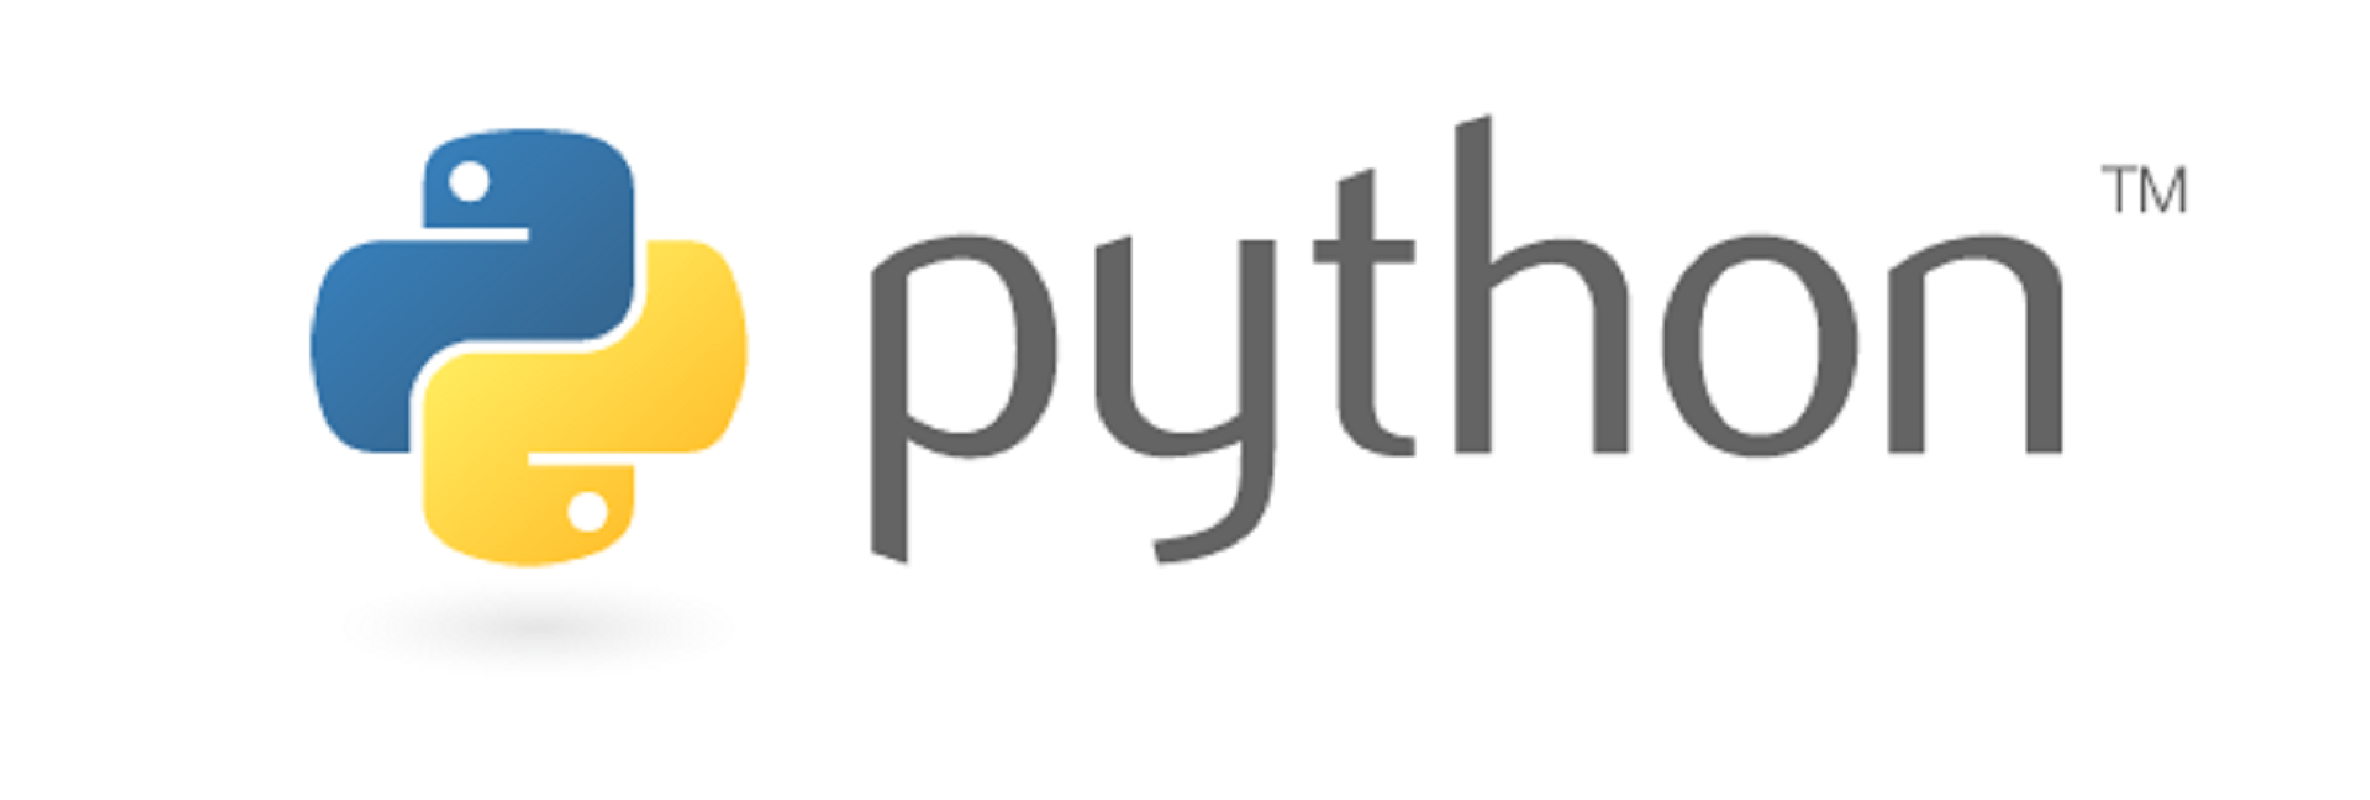

Petit sondage : https://docs.google.com/forms/d/e/1FAIpQLSec4ezR4URQ7-ft6WKsVkvUdyjrmddulPNA77QVUq4v0wyNRw/viewform?usp=publish-editor

Pour les bases : https://www.w3schools.com/python/default.asp

## Petit rappel sur la mutabilité et l'immutabilité

En plus d'être un langage à typage dynamique (contrairement au C, par exemple), Python distingue deux grandes catégories d'objets selon leur comportement en mémoire.

### Les types non-mutables : `int`, `float`, `str`, `tuple`  

Un objet non-mutable ne peut pas être modifié après sa création. Toute "modification" est en réalité un nouvel objet en mémoirE.

Exemple :


In [ ]:
a = 1
b = a
b = b + 2
print(f'a = {a}')
print(f'b = {b}\n')

a = 1
b = 3



Ici `a` pointe vers un nouvel objet et `b` reste inchangé.

### Les types mutables : `list`, `dict`, `set`, `numpy.ndarray`

Un objet mutable peut être modifié en place, sans changer son "identité" mémoire.

Exemple :

In [ ]:
a = [1, 2]
b = a
b.append(3)
print(f'a = {a}')
print(f'b = {b}')

a = [1, 2, 3]
b = [1, 2, 3]


## Référence et copie

Dans l'exmeple précédent, `a` et `b` sont mutables. S'il on veut travailler sur l'un des objets sans affecter l'autre, il faudra faire une copie de cet objet.

Exemple :

In [ ]:
a = [1, 2]
b = a.copy()
b.append(3)
print(f'a = {a}')
print(f'b = {b}')

a = [1, 2]
b = [1, 2, 3]


## "Shallow copy" et "Deep copy"

L'exemple précédent présente une copie dite "peu profonde" (shallow copy). C'est suffisant pour des objets "simples", mais lorsque l'on imbrique des objets les uns dans les autres, il est parfois préférables d'effectuer une copie "profonde" (deep copy).

Exemple :

In [ ]:
print("Shallow copy example")
a = [1, [2, 3]]
b = a.copy()
b[1].append(1)
print(f'a = {a}')
print(f'b = {b}\n')

import copy
print("Deep copy example")
a = [1, [2, 3]]
b = copy.deepcopy(a)
b[1].append(1)
print(f'a = {a}')
print(f'b = {b}')

Shallow copy example
a = [1, [2, 3, 1]]
b = [1, [2, 3, 1]]

Deep copy example
a = [1, [2, 3]]
b = [1, [2, 3, 1]]


### Takeaway
* Toutes les variables sont des objets
* Les objets peuvent être mutables ou non-mutables
* `copy` crée un nouvel objet en réutilisant les objets internes.
* `deepcopy` recrée récursivement tous les objets internes

`deepcopy` assure qu'aucune modiciation de l'objet copié n'affectera la copie. En revanche, l'exécution est plus longue.

## Rapide tour sur les boucles et listes compréhensives



In [ ]:
import time
import numpy as np

exp1_exec_time = []
exp2_exec_time = []

for i in range(100):

  # Filling a list with integers between 0 and 9999 with a loop
  a = []
  t0 = time.time()
  for i in range(10000):
      a.append(i)
  t1 = time.time()
  exp1_exec_time.append(t1 - t0)

  # Filling a list with integers between 0 and 9999 with a comprehensive list
  t0 = time.time()
  a = list(range(10000))
  t1 = time.time()
  exp2_exec_time.append(t1 - t0)

print(f"Exp 1 execution time: {np.mean(exp1_exec_time)}")
print(f"Exp 2 execution time: {np.mean(exp2_exec_time)}")


Exp 1 execution time: 0.0007501840591430664
Exp 2 execution time: 0.00017723321914672852


In [ ]:
import time
import numpy as np

exp1_exec_time = []
exp2_exec_time = []

for i in range(100):

  # Exemple sans liste compréhensive
  a = []
  t0 = time.time()
  for i in range(10000):
      a.append(i*2-5)
  t1 = time.time()
  exp1_exec_time.append(t1 - t0)

  # Exemple avec liste compréhensive
  t0 = time.time()
  a = [i*2-5 for i in range(10000)]
  t1 = time.time()
  exp2_exec_time.append(t1 - t0)

print(f"Exp 1 execution time: {np.mean(exp1_exec_time)}")
print(f"Exp 2 execution time: {np.mean(exp2_exec_time)}")

Exp 1 execution time: 0.0012866711616516112
Exp 2 execution time: 0.0007541060447692871


In [ ]:
import time
import numpy as np

exp1_exec_time = []
exp2_exec_time = []

# Example w/o comprehensive list
for i in range(100):
  t0 = time.time()

  a = []
  for i in range(1000):
    if i != 0 and i != 9:
      a.append(1)
    else:
      a.append(0)

  t1 = time.time()
  exp1_exec_time.append(t1 - t0)

# Example w/ comprehensive list
  t0 = time.time()

  a = [1 if i != 0 and i != 9 else 0 for i in range(1000)]

  t1 = time.time()
  exp2_exec_time.append(t1 - t0)

print(f"Exp 1 execution time: {np.mean(exp1_exec_time)}")
print(f"Exp 2 execution time: {np.mean(exp2_exec_time)}")

Exp 1 execution time: 0.00015104293823242187
Exp 2 execution time: 5.7373046875e-05


### Takeaway

* Limiter l'usage des boucles (très mal optimisée en Python)
* Utiliser les listes compréhensives au maximum (qui sont codées en C)

Pourquoi ?  

En C, les tableaux sont généralement contigus en mémoire (hormis les tableaux dynamiquex). L'accès à la mémoire est séquentiel.

En Python, une liste est un tableau de pointeurs vers les objets. Chaque entier est un objet séparé alloué sur le tas .

## Petit challenge pour voir si vous suivez
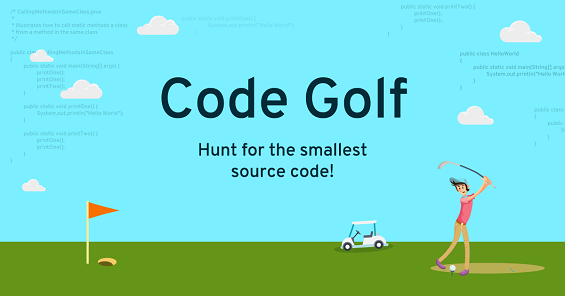

Code Golf : https://code.golf/fizz-buzz#python

Le but du **Code Golf** est de trouver une solution à un problème de programation en utilsant le moins de caractères possible.

Le problème du Fizz Buzz :

> Print the numbers from 1 to 100 inclusive, each on their own line.

> If, however, the number is a multiple of three then print Fizz instead, and if the number is a multiple of five then print Buzz.

> If multiple conditions hold true then all replacements should be printed, for example 15 should print FizzBuzz.

Vous avez 10 minutes pour trouver une solution !
* Contrôle des présences ;-)
* Petit test de live coding...
* Pas de note, pas besoin de tricher, donnez votre meilleur !


## Problème de mémoire

Toute les listes compréhensives sont en mémoire, même si l'on en utilise qu'une petite partie.
* Acceptable pour de petits objets
* Compliqué pour des grosses structures (images, tenseurs, etc.)

Pour les grosses structures, ont peut passer par des générateurs qui sont très utilisés pour les datasets en IA (voir les classes DataLoader et Dataset en Pytorch par exemple).


```python
def load_images(paths):
    for p in paths:
        yield load_image(p)
```
Les images ne sont pas chargées à l'avance, ce qui permet de grandement réduire l'empreinte mémoire.

Python crée un itérateur paresseux qui ne chargera l'image qu'une fois demandée.

* Légèrement plus lent par élément (inline vs online)
* Pas d'accès mémoire possible

In [ ]:
def square_generator(numbers):
    for n in numbers:
        print(f"Calcul de {n}^2...")
        yield n * n

nums = range(3)
gen = square_generator(nums)

for i, x in enumerate(gen):
    print(f"{i}^2 = {x}")

Calcul de 0^2...
0^2 = 0
Calcul de 1^2...
1^2 = 1
Calcul de 2^2...
2^2 = 4


# NumPy

## Listes Python

`L = [1, 2, 3]`

Petit rappel :
* `L` est un tableau de pointeurs
* Chaque élément est un objet python (PyObject).
* Allocation mémoire dispersée

## Arrays NumPy

```python
A = np.array([1, 2, 3], dtype=np.int32)
```

La bibliothèque NumPy est codée en C :
* Les blocs mémoires sont contigus
* La taille de l'array est connue
* Accès séquentiel possible -> Boucles internes en C

## Broadcasting

```python
A = np.array([1, 2, 3])
B = A + 10
```

NumPy ne crée pas un tableau `[10, 10, 10]` à ajouter à `A`.  
Il applique l'opération élément par élément en C.

```python
for i in range(3):
    B[i] = A[i] + 10
```
Pas de boucles Python mal optmisées :-)

Attention aux objets temporaires :
```python
a = np.ones(1_000_000, dtype=np.float64) # 1 million x float64 = 8 Mo
b = np.ones(1_000_000, dtype=np.float64) # 8 Mo

c = a + b # 8 Mo
```
Ici `c` utilise deux fois plus de mémoire que nécessaire si on réutilisait a ou b directement. Au total, ce sont 24 Mo qui sont alloués. Cela parraît peu, mais dans une boucle en temsp réel, ça peut avoir beaucoup d'impact.

On préferera donc réutiliser des espaces mémoires déjà aloués :
```python
a = np.ones(1_000_000, dtype=np.float64) # 8 Mo
b = np.ones(1_000_000, dtype=np.float64) # 8 Mo

a += b # No third array -> better RAM management
```



## Vectorisation
Numpy est optimisé pour faire du calcul matriciel.


In [ ]:
# Example 1-D

import time
import numpy as np

exp1_exec_time = []
exp2_exec_time = []

# Example w/ for loop
for i in range(100):
  t0 = time.time()

  A1 = np.ones(100, dtype=np.float32)

  for j in range(len(A1)):
      A1[j] = (A1[j] + 10) / 255

  t1 = time.time()
  exp1_exec_time.append(t1 - t0)

# Example w/o for loop
  t0 = time.time()

  A2 = (np.ones(100, dtype=np.float32) + 10) / 255

  t1 = time.time()
  exp2_exec_time.append(t1 - t0)

print(f"Exp 1 execution time: {np.mean(exp1_exec_time)}")
print(f"Exp 2 execution time: {np.mean(exp2_exec_time)}")



Exp 1 execution time: 8.45479965209961e-05
Exp 2 execution time: 1.1115074157714843e-05


In [ ]:
# Example 1-D

import time
import numpy as np

exp1_exec_time = []
exp2_exec_time = []

# Example w/ for loop
for i in range(100):
  t0 = time.time()

  A1 = np.ones([100,100], dtype=np.float32)

  for j in range(len(A1)):
    for k in range(len(A1)):
      A1[j,k] = (A1[j,k] + 10) / 255

  t1 = time.time()
  exp1_exec_time.append(t1 - t0)

# Example w/o for loop
  t0 = time.time()

  A2 = (np.ones([100,100], dtype=np.float32) + 10) / 255

  t1 = time.time()
  exp2_exec_time.append(t1 - t0)

print(f"Exp 1 execution time: {np.mean(exp1_exec_time)}")
print(f"Exp 2 execution time: {np.mean(exp2_exec_time)}")

Exp 1 execution time: 0.0064786624908447265
Exp 2 execution time: 3.4711360931396485e-05


### Takeaway

* NumPy est codé en C et est généralement plus rapide que du code Pythonique pure.
* Le calcul matriciel est beaucoup plus rapide et compréhensible (bien que derrière, ça reste des opérations éléments par élements)

## Quelques exemples d'utilisation en ML

### Normalisation des données (cas d'un tableau de données)
```python
X = (X - X.mean()) / X.std()
```
* Moyenne à 0
* Std à 1

### Prétraitement des features (cas d'une image en niveau de gris)
```python
X = np.clip(X, 0, 255) / 255
```
* Plage de valeur entre 0 et 255
* Valeurs normalisées entre 0 et 1

## Introduction à la **POO**

Python est un langage de **P**rogrammation **O**rienté **O**bjet.  
Presque tout en Python est un objet, avec ses **propriétés** (**attribues**) et **méthodes**.

Une classe peut être vue comme le **constructeur** d'un objet, elle contient ses attribues et méthodes.

Cela permet de mieux encapsuler son code, le rendant plus réutilisable, extensible et compréhensible.  
Par exemple, si nous avons besoin de représenter une personne dans un programme. Nous pourrions tout à fait écrire :

In [ ]:
person_name = 'Ben'
person_age = 42
print(f"{person_name} a {person_age} ans.")

Ben a 42 ans.


Ce code est tout à fait correct. Il serait néanmoins plus pratique de créer un objet Person permettant d'encapsuler les informations nécessaires à la définition d'une personne. Voici comment écrire cette classe :

In [ ]:
class Person:
    # Constructor
    def __init__(self, name: str, age: int):
        # Attributs
        self.name = name
        self.age = age

    # Methods
    def say_hello(self) -> None:
        print(f"Hello, my name is {self.name} and I'm {self.age} years old.")

# Class initialization
name = 'Ben'
Person1 = Person(name=name, age=42)
Person1.say_hello()

Hello, my name is Ben and I'm 42.1 years old.


Toutes les classes ont une fonction appelée `__init__(self, ...)` qui est toujours executée lorsque la classe est initialisée. Cette fonction peut-être vue comme le constructeur de la classe (que vous verrez l'année prochaine en C++). \\
On peut également accéder, modifier, créer ou encore supprimer un attribut :

In [ ]:
name = Person1.name
Person1.age = 23
Person1.student = False  # Create student attribut
print(Person1.student)

False


In [ ]:
del Person1.student      # Delete student attribut
print(Person1.student)

AttributeError: 'Person' object has no attribute 'student'

Une classe peut également contenir la fonction `__str__(self)`, permettant de renvoyer une chaîne de caractère quand l'objet est appelé par la fonction `print()`.

In [ ]:
class Person:
    def __init__(self, name: str = "John", age: int = 21):
        self.name = name
        self.age = age

    def __str__(self):
        return f"{self.name} - ({self.age})"

    def say_hello(self) -> None:
        print(f"Hello, my name is {self.name} and I'm {self.age} years old.")

Person1 = Person("Ben", 30)
print(Person1) # Function __str__()

Ben - (30)


La fonction `__len__(self)` permet de redéfinir ce que la fonction len() affichera lorsqu'elle est utilisée sur un objet instancié.



In [ ]:
class Person:
    def __init__(self, name: str = "John", age: int = 21):
        self.name = name
        self.age = age

    def __len__(self):
        return len(self.name)

    def __str__(self):
        return f"{self.name} - ({self.age})"

    def say_hello(self) -> None:
        print(f"Hello, my name is {self.name} and I'm {self.age} years old.")

Person1 = Person("Ben", 30)
print(f"Le prénom a {len(Person1)} lettres.") # Function __len__()

Le prénom a 3 lettres.


La **POO** permet également le concept d'**héritage**. Une classe peut ainsi hériter de toutes les méthodes et propriétés d'une autre classe.

On dit que la classe **enfant** hérite de la classe **parent**. Par exemple, on veut créer une classe Student à partir de la classe Person :

In [ ]:
class Student(Person):
    def __init__(self, name, age, student_id):
        super().__init__(name, age)
        self.student_id = student_id

Student1 = Student("Ben", 21, "1234")
Student1.say_hello()

Hello, my name is Ben and I'm 21 years old.


On peut noter la fonction `super()` qui permet à la classe enfant d'hériter des éléments de sa classe parent.

Si vous ajoutez une méthode dans la classe enfant ayant le même nom qu'une méthode de la classe parent, celle-ci sera remplacée.

In [ ]:
class Student(Person):
    def __init__(self, name: str, age: int, student_id: str) -> None:
        super().__init__(name, age)
        self.student_id = student_id

    def say_hello(self) -> None:
        print(f"Hello, my name is {self.name} and I'm {self.age} years old. My student ID is {self.student_id}.")

Student1 = Student(name="Ben", age=21, student_id="1234")
Student1.say_hello()

Hello, my name is Ben and I'm 21 years old. My student ID is 1234.


Le polymorphisme est souvent utilisé lorsque différentes classes peuvent avoir le même nom de méthodes.

Par exemple :

In [ ]:
class Car:
  def __init__(self, brand: str, model: str):
    self.brand = brand
    self.model = model

  def move(self) -> None:
    return "Drive!"

class Boat:
  def __init__(self, brand: str, model: str):
    self.brand = brand
    self.model = model

  def move(self) -> None:
    return "Sail!"

class Plane:
  def __init__(self, brand: str, model: str):
    self.brand = brand
    self.model = model

  def move(self) -> None:
    return "Fly!"

En utilisant la propriété du polymorphisme en POO, on peut créer une classe parent `Vehicule` et donc faire de `Car`, `Boat`, `Plane` des enfants de cette dernière.

Les enfants héritent des méthodes du parent, mais peuvent ensuite les "override" :

In [ ]:
class Vehicle:
  def __init__(self, brand: str, model: str):
    self.brand = brand
    self.model = model

  def move(self) -> None:
    return "move"

class Car(Vehicle):
  pass

class Boat(Vehicle):
  def move(self) -> None:
    return "sail"

class Plane(Vehicle):
  def move(self) -> None:
    return "fly"

Car1 = Car("Ford", "Mustang")       # Create a Car object
Boat1 = Boat("Ibiza", "Touring 20") # Create a Boat object
Plane1 = Plane("Boeing", "747")     # Create a Plane object

for x in (Car1, Boat1, Plane1):
  print(f"{x.brand} {x.model} {x.move()}!")

Ford Mustang move!
Ibiza Touring 20 sail!
Boeing 747 fly!


Une bonne pratique est aussi de protéger certaines données d'une classe pour la rendre idiot proof.

Pour cela on peut utiliser le principe d'encapsulation pour contrôler comment certaines parties de la classes peuvent être accédées :

In [ ]:
class Person:
  def __init__(self, name, age):
    self.name = name
    self.__age = age # Private property

P1 = Person("Emil", 25)
print(P1.name)
print(P1.__age) # Error

Emil


AttributeError: 'Person' object has no attribute '__age'

Afin de donner accès à cette partie de la classe, on peut utiliser des setters et getters :

In [ ]:
class Person:
  def __init__(self, name, age):
    self.name = name
    self.__age = age

  def get_age(self):
    return self.__age

  def set_age(self, age):
    if age > 0:
      self.__age = age
    else:
      print("Age must be positive")

P1 = Person("Tobias", 25)
print(P1.get_age())

P1.set_age(26)
print(P1.get_age())

25
26


Les méthodes d'une classe peuvent également être privées :

In [ ]:
class Calculator:
  def __init__(self):
    self.result = 0

  def __validate(self, num):
    if not isinstance(num, (int, float)):
      return False
    return True

  def add(self, num):
    if self.__validate(num):
      self.result += num
    else:
      print("Invalid number")

Ici l'utilisateur n'a pas besoin d'utiliser la méthode `validate`. Cette méthode est alors rendue privée grâce au `__` ajouté.

# Quelques recommendations

Un projet Python (et pas que...) sera souvent organisé comme suit :
- Un dossier src/ contenant tous les programmes essentiels au projet.
- Un dossier /utils contenant des fonctions utilitaires réutilisables (gestion des paths, création de dossiers, etc.).
- Un fichier main.py qui exectuera l'entièreté du code.
- Un fichier pour chaque classe.
- Un dossier tests/ pour les tetes unitaires.
- Un dossier /data pour toutes les données utiles au projet (petite base de données, des images, textes, etc.).
- Un README.md file qui sera la couverture du projet, présentant comment installer et faire fonctionner le projet.
- Un fichier requirments.txt qui listera toutes les bibliothèques python à télécharger.
```
project/
  src/
    utils/
      utils.py
    main.py
    class1.py
    class2.py
  tests/
  data/
  README.md
  requirements.txt
```

Généralement, on préfera séparer les différentes parties d'un projet dans différents fichiers, puis les appeler dans un fichier `main.py` proprement.

On peut également réaliser des tests unitaires directement dans l'un des fichiers sans affecter l'utilisation du `main.py`.

Par exemple :

Fichier : `calculator.py`

```python
# File: calculator.py

class Calculator:
    """
    - Description:

    Simple calculator.

    - Parameters:

    initial_value : float, optional
        Initial value of the calculator (default is 0.0).

    - Attributes:

    result : float
        Current result of the calculator.

    - Methods:

    add(x: float) -> None
        Add a number to the current result.

    multiply(x: float) -> None
        Multiply the current result by a number.

    reset() -> None
        Reset the result to zero.
    """

    def __init__(self, initial_value: float = 0.0):
        self.result = 0

    def add(self, x: float) -> None:
        self.result += x

    def multiply(self, x: float) -> None:
        self.result *= x

    def reset(self) -> None:
        self.result = 0


def main():
    Calc = Calculator()
    Calc.add(5)
    Calc.multiply(3)
    print(f"Result = {Calc.result}")


if __name__ == "__main__":
    main()
```

Le `if __name__ == "__main__":` indique que ce code ne s'exécutera que si le fichier est lancé directement et pas s'il est importé en tant que module.

```python
# File: main.py

from calculator import Calculator

Calc = Calculator()
Calc.add(5)
Calc.multiply(3)
print(f"Result = {Calc.result}")
```

On peut également ajouter des arguments via la bibliothèque `argparse`. Cela permet à un utilisateur de renseigner les paramètres directement dans le CLI (Command Line Interface) et de lancer le script.

```python
# File: main.py

from calculator import Calculato
import argparse


def main(args):
  Calc = Calculator(initial_value=args.initial)

  if args.add is not None:
        calc.add(args.add)

    if args.multiply is not None:
        calc.multiply(args.multiply)

    print(f"Result = {calc.result}")


if __name__ == "__main__":

  parser = argparse.ArgumentParser(description="Simple command-line calculator")

  parser.add_argument("--initial", type=float, default=0.0, help="Initial value of the calculator")

  parser.add_argument("--add", type=float, help="Value to add")

  parser.add_argument("--multiply", type=float, help="Value to multiply by")

  args = parser.parse_args()
  main(args)

```


```bash
python main.py
# Result = 0.0

python main.py --initial 10 --add 5
# Result = 15.0

python main.py --initial 10 --add 5 --multiply 2
# Result = 30.0
```

Il existe également certaines convention que l'on peut retrouver dans le PEP (Python Enhancement Proposal) 8 : https://peps.python.org/pep-0008/


```python
my_variable = 42      # Snake_case for variable
My_class = MyClass()  # CapWords for classes
```

# Pandas

Pandas (basée sur NumPy) est une bibliothèque permettant de manipuler des tableaux de données de manière efficace.

On peut noter deux structures principales de données : les Series et DataFrame

* DataFrame vs Series
apply (et pourquoi l'éviter)
* Indexation efficace
* Jointures
* Lecture de gros fichier

In [ ]:
import pandas as pd

# Serie
s = pd.Series([10, 20, 30], index=["a", "b", "c"])
print(s)

# DataFrame
df = pd.DataFrame({
    "name": ["Alice", "Bob", "Charlie", "Dan", "Ed", "Frayer", "Greg", "Harry"],
    "age": [25, 30, 35, 30, 25, 35, np.nan, 42],
    "salary": [50000, 60000, 70000, 55000, 17000, 67000, np.nan, np.nan]
})
print(df)
print()
print(df.head())


a    10
b    20
c    30
dtype: int64
      name   age   salary
0    Alice  25.0  50000.0
1      Bob  30.0  60000.0
2  Charlie  35.0  70000.0
3      Dan  30.0  55000.0
4       Ed  25.0  17000.0
5   Frayer  35.0  67000.0
6     Greg   NaN      NaN
7    Harry  42.0      NaN

      name   age   salary
0    Alice  25.0  50000.0
1      Bob  30.0  60000.0
2  Charlie  35.0  70000.0
3      Dan  30.0  55000.0
4       Ed  25.0  17000.0


In [ ]:
# Column selection
names = df["name"]
print(names)
print()

# Subset selection
subset = df[["name", "salary"]]
print(subset)

0      Alice
1        Bob
2    Charlie
3        Dan
4         Ed
5     Frayer
6       Greg
7      Harry
Name: name, dtype: object

      name   salary
0    Alice  50000.0
1      Bob  60000.0
2  Charlie  70000.0
3      Dan  55000.0
4       Ed  17000.0
5   Frayer  67000.0
6     Greg      NaN
7    Harry      NaN


In [ ]:
# Position indexation
row1 = df.iloc[0]
rows = df.iloc[1:3]
print(row1)
print()
print(rows)
print()

# Label indexation
row_alice = df.loc[df["name"] == "Alice"]
print(row_alice)
print()

# Conditional indexation
high_salary = df[df["salary"] > 55000]
print(high_salary)

name        Alice
age          25.0
salary    50000.0
Name: 0, dtype: object

      name   age   salary
1      Bob  30.0  60000.0
2  Charlie  35.0  70000.0

    name   age   salary
0  Alice  25.0  50000.0

      name   age   salary
1      Bob  30.0  60000.0
2  Charlie  35.0  70000.0
5   Frayer  35.0  67000.0


In [ ]:
# Add a column
df["age_plus_5"] = df["age"] + 5

# Apply a function
df["age_squared"] = df["age"].apply(lambda x: x**2)

In [ ]:
# Some stats
df_mean_salary_per_age = df.groupby("age")["salary"].mean()
print(df_mean_salary_per_age)
print()
df_mean_salary_per_age = df.groupby("age")["salary"].std()
print(df_mean_salary_per_age)
print()


age
25.0    33500.0
30.0    57500.0
35.0    68500.0
42.0        NaN
Name: salary, dtype: float64

age
25.0    23334.523779
30.0     3535.533906
35.0     2121.320344
42.0             NaN
Name: salary, dtype: float64



Dans le contexte du ML (Machine Learning), on ne peut souvent pas travailler avec des valeurs manquantes (ici `np.nan`). Pour ça, on pourra tout simplement supprimer ces lignes ou les remplacer par une constante.

In [ ]:
df_clean = df.dropna()
print("NA value removed")
print(df_clean)
print()

print("NA value filled with a constant")
df_filled = df.fillna(0)
print(df_filled)
print()

NA value removed
      name   age   salary
0    Alice  25.0  50000.0
1      Bob  30.0  60000.0
2  Charlie  35.0  70000.0
3      Dan  30.0  55000.0
4       Ed  25.0  17000.0
5   Frayer  35.0  67000.0

NA value filled with a constant
      name   age   salary
0    Alice  25.0  50000.0
1      Bob  30.0  60000.0
2  Charlie  35.0  70000.0
3      Dan  30.0  55000.0
4       Ed  25.0  17000.0
5   Frayer  35.0  67000.0
6     Greg   0.0      0.0
7    Harry  42.0      0.0



## Simple projet ML

Le but ici est de télécharger une base de données constituées de personnes qui ont renseigné leur âge, profession et salaire.

On voudra prédire le salaire pour une profession et un âge donné.

Une bonne pratique est de toujours visualiser ses données avant de faire quoi que ce soit.

In [ ]:
import pandas as pd

path = "https://api.slingacademy.com/v1/sample-data/files/salaries.csv" # https://api.slingacademy.com/v1/sample-data/files/salaries.csv
df = pd.read_csv(path)
df.head()

,Name,Age,Job,Salary
0,Kevin Sanders,24,Software Engineer,7300
1,Lisa Mills,26,High School Teacher,6100
2,Donna Allison,27,Dentist,12700
3,Michael Schmitt,43,Dentist,17500
4,Lisa Shaffer,31,Accountant,7400


In [ ]:
df_mean_salary_per_age = df.groupby("Age")["Salary"].mean()
df_mean_salary_per_job = df.groupby("Job")["Salary"].mean()

print(df_mean_salary_per_age)
print()
print(df_mean_salary_per_job)

Age
23     7304.761905
24     7806.896552
25     8448.387097
26     8057.894737
27     8929.411765
28     9887.500000
29    10132.258065
30    10389.473684
31     9290.909091
32     9840.000000
33    10651.851852
34    10934.375000
35    11075.000000
36    11420.000000
37    11870.588235
38    11667.741935
39    11472.222222
40    13055.555556
41    12513.636364
42    12828.000000
43    13731.250000
44    13708.000000
45    14908.695652
46    14750.000000
47    14603.703704
48    14379.166667
49    14830.769231
50    15268.421053
51    16321.428571
52    16088.888889
53    17260.000000
54    17234.482759
55    16413.043478
56    17105.555556
57    18056.250000
58    18158.823529
59    18516.666667
60    18656.000000
61    17995.652174
62    19500.000000
63    19614.285714
64    19826.666667
65    20400.000000
Name: Salary, dtype: float64

Job
Accountant             12327.983539
Dentist                16295.505618
High School Teacher    11402.066116
Software Engineer      14127.419355
N

On peut également visualiser les données à l'aide de `matplotlib` pour mieux se rendre compte de leurs tendances. L'exemple ici est simple, on peut simpelemnt regarder un plot 2D des données.

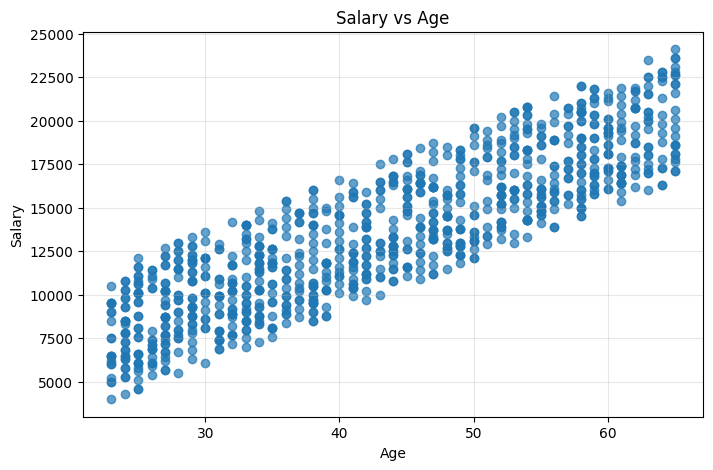

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(df["Age"], df["Salary"], alpha=0.7)

plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Salary vs Age")

plt.grid(True, alpha=0.3)
plt.show()

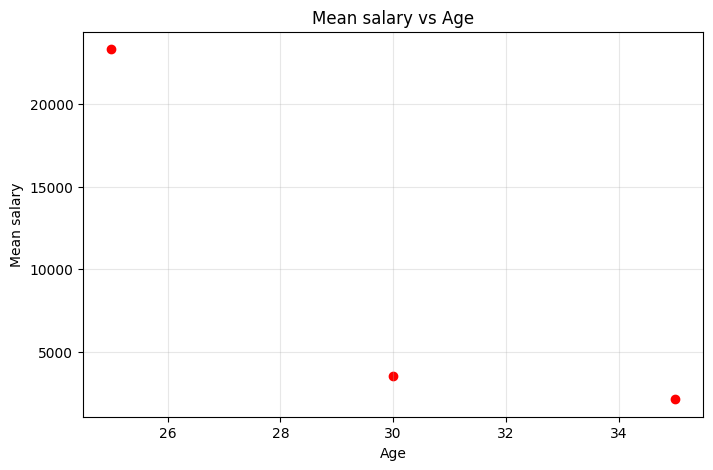

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(df_mean_salary_per_age.index, df_mean_salary_per_age.values, color="red")

plt.xlabel("Age")
plt.ylabel("Mean salary")
plt.title("Mean salary vs Age")

plt.grid(True, alpha=0.3)
plt.show()

On va maintenant faire une simple regression linaire pour estimer le salaire en fonction de l'âge et de la profession.

Cependant, la profession étant une chaîne de caractère, on ne peut pas faire une regression linéaire directement. Il faudra d'abord encoder ces chaînes de caractères en "one-hot".

In [ ]:
X = df[["Age", "Job"]]

# One-hot encode Job
X_encoded = pd.get_dummies(X, columns=["Job"], drop_first=False)
X_encoded.head()


,Age,Job_Accountant,Job_Dentist,Job_High School Teacher,Job_Software Engineer
0,24,False,False,False,True
1,26,False,False,True,False
2,27,False,True,False,False
3,43,False,True,False,False
4,31,True,False,False,False


Maintenant, il faut diviser le dataset en deux. Une partie qui permettra d'entraîner le modèle de regression, et une autre pour tester ce modèle sur des données encore jamais vues.

Généralement, on utilise 80% des données pour l'entraînement et 20% pour le test.

In [ ]:
from sklearn.model_selection import train_test_split

y = df["Salary"]

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


On peut maintenant entraîner le modèle de regression.

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

On peut alors prédire le salaire sur le jeu de test, puis calculer l'erreur absolue moyenne pour évaluer les performances du modèle.

La MAE (Mean Absolute Error) est définie par :

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$

où :
- $y_i$ est la valeur réelle,
- $\hat{y}_i$ est la valeur prédite,
- $n$ est le nombre d'exemples.

Il existe d'autres métriques comme la RMSE (Root Mean Squared Error) ou encore le coefficient R$^2$ qui sont également très utilisées suivant l'application.

In [ ]:
from sklearn.metrics import mean_absolute_error

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

MAE: 616.3696090539925


En moyenne, le modèle se trompe de 600 dollars par prédiction.

In [ ]:
mean_salary = df["Salary"].mean()

error_pct = (mae / mean_salary) * 100
print(f"Relative error ≈ {error_pct:.1f}%")

Erreur moyenne relative ≈ 4.5%


# Parallélisme

Il peut arriver qu'on veuille executer deux programmes (ayant des parties bloquantes) simultanément.

Par exemple :
- Un programme qui télécharge des fichiers
- Un programme qui calcule des statistiques

Sans parallélisme, ces programmes doivent attendre l'un l'autre pour avancer, alors qu'ils pourraient tourner chacun de leur côté et échanger des données quand nécessaire.

Pour cela, on peut paralléliser les calculs via du **Threading** ou du **Multiprocessing**.
- **Threading** : un thread est une "unité d'exécution" à l'intérieur d'un processus qui partage la mémoire avec les autres threads de ce même processus. C'est idéal pour les tâches **I/O-bound** (lecture/écriture, réseau), mais limité pour les calculs **CPU-bound** à cause du **GIL** (Global Interpreter Lock).
- **Multiprocessing** : chaque processus est indépendant et possède sa propre mémoire. C'est idéal pour exploiter plusieurs coeurs CPU pour des calculs intensifs (CPU-bound).

In [ ]:
import time

def download_file(name):
    print(f"Start downloading {name}")
    time.sleep(2)
    print(f"Downloading done")

t0 = time.time()
download_file("File1.zip")
download_file("File2.zip")
t1 = time.time()

print(f"Exect time: {t1-t0:.2f} s")



Start downloading File1.zip
Start downloading File2.zip
Exect time: 4.00 s


In [ ]:
import threading
import time

def download_file(name):
    print(f"Start downloading {name}")
    time.sleep(2)
    print(f"Downloading done")


t0 = time.time()
threads = [
    threading.Thread(target=download_file, args=("File1.zip",)),
    threading.Thread(target=download_file, args=("File2.zip",)),
]

for thread in threads:
  thread.start()

for thread in threads:
  thread.join()

t1 = time.time()

print(f"Exect time: {t1-t0:.2f} s")

Start downloading File1.zip
Start downloading File2.zip
Exect time: 2.00 s


In [ ]:
# CPU-bound
n = 10_000_000


In [ ]:
import time

def compute_thing(n):
    print(f"Start computing")
    total = sum(i*i for i in range(n))
    print(f"Sum done: {total}")
    print(f"Computing done")

t0 = time.time()
compute_thing(n)
compute_thing(n)
t1 = time.time()

print(f"Exect time: {t1-t0:.2f} s")

Start computing
Sum done: 333333283333335000000
Computing done
Start computing
Sum done: 333333283333335000000
Computing done
Exect time: 1.99 s


In [ ]:
import threading
import time

def compute_thing(n):
    print(f"Start computing")
    total = sum(i*i for i in range(n))
    print(f"Sum done: {total}")
    print(f"Computing done")

t0 = time.time()
threads = [
    threading.Thread(target=compute_thing, args=(n,)),
    threading.Thread(target=compute_thing, args=(n,)),
]

for thread in threads:
  thread.start()

for thread in threads:
  thread.join()

t1 = time.time()
print(f"Exect time: {t1-t0:.2f} s")

Start computing
Start computing
Sum done: 333333283333335000000Sum done: 333333283333335000000
Computing done

Computing done
Exect time: 2.08 s


In [ ]:
from multiprocessing import Process

def compute_thing(n):
    print(f"Start computing")
    total = sum(i*i for i in range(n))
    print(f"Sum done: {total}")
    print(f"Computing done")

t0 = time.time()
processes = [
    Process(target=compute_thing, args=(n,)),
    Process(target=compute_thing, args=(n,))
]

for p in processes: p.start()
for p in processes: p.join()

t1 = time.time()
print(f"Exect time: {t1-t0:.2f} s")

Start computing
Start computing
Sum done: 41666665416666675000000
Computing done
Sum done: 41666665416666675000000
Computing done
Exect time: 12.76 s


Exemple du multiprocessing sur ma machine :-)

Attention : le threading est plus rapide à lancer que le multiprocessing ; chaque processus a sa propre mémoire.
Suivant la tâche, le tradeoff temps d'activation / temps d'exécution n'est pas toujours bon pour le multiprocessing.

# Git

* Créer un projet
* add, commit, push, fetch, branch et pull